In [4]:
import numpy as np
import pandas as pd
from collections import Counter

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi']= 400  # keep this low, else it takes times to render on matplotlib
mpl.rc("savefig", dpi=300)
inline_rc = dict(mpl.rcParams)   # for resetting purposes
%matplotlib inline

# Data

In [2]:
def getData(filename, verbose=0):
    df             = pd.read_csv(filename)
    df.columns     = df.columns.str.strip()
    df['DATETIME'] = pd.to_datetime(df['DATETIME'], format='%d/%m/%y %H')
    df.set_index('DATETIME', inplace=True)
    
    
    if verbose:
        print (' -------------------------------------------------------------------------------------- ')
        print (' - Total Len : ', len(df))
        print (' - Label     : ', df['ATT_FLAG'].value_counts())
        print (' - Columns   : ', df.columns, ' || Total : ', len(df.columns))
        print (' - Dates     : ', df.index[0], ' -- ', df.index[-1])
        # print (df.head())
    return df
    

if __name__ == "__main__":
    df_train = getData('data/BATADAL_dataset03.csv', verbose=1)
    df_val   = getData('data/BATADAL_dataset04.csv', verbose=1)

 -------------------------------------------------------------------------------------- 
 - Total Len :  8761
 - Label     :  0    8761
Name: ATT_FLAG, dtype: int64
 - Columns   :  Index(['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1',
       'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4', 'F_PU5',
       'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU9',
       'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2', 'S_V2',
       'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
       'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')  || Total :  44
 - Dates     :  2014-01-06 00:00:00  --  2015-01-06 00:00:00
 -------------------------------------------------------------------------------------- 
 - Total Len :  4177
 - Label     :  -999    3958
 1       219
Name: ATT_FLAG, dtype: int64
 - Columns   :  Index(['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1',
   

# Task
 - Q1 - What kinds of signals exist (vizualize them)
 - Q2 - Are the signals correlated (presence/absence)
 - Q3 - Is predicting the next value easy or hard? Use any method. (what is the performance?)

# Task 1.1 - Type of Signals

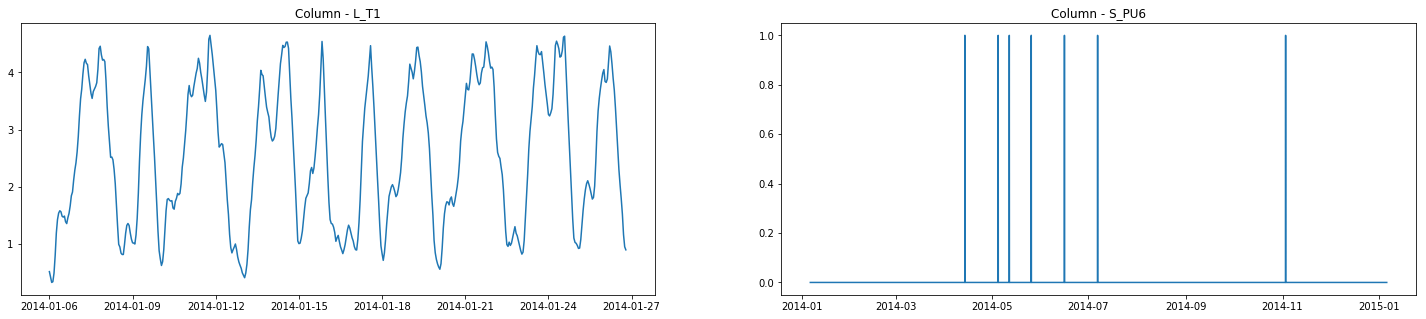

In [5]:
def columnPlotter(df, column):
    f, axarr= plt.subplots(1, figsize=(15,5))
    axarr.set_title('Column : ' + str(column))
    axarr.plot(df[column]); plt.show()
    plt.show()

if (0):
    for col in df_train.columns:
        columnPlotter(df_train, col)

    # columnPlotter(df_train, 'L_T1')
    # columnPlotter(df_train, 'S_PU6')
    # columnPlotter(df_val, 'ATT_FLAG')
else:
    f,axarr = plt.subplots(1,2, figsize=(25,5))
    axarr[0].plot(df_train['L_T1'][:500])
    axarr[0].set_title('Column - L_T1' )
    axarr[1].plot(df_train['S_PU6'])
    axarr[1].set_title('Column - S_PU6' )

# Task 1.2 - Correlation
 - redder colors represent high positive correlation
 - blue'er colors represent high negative correlation

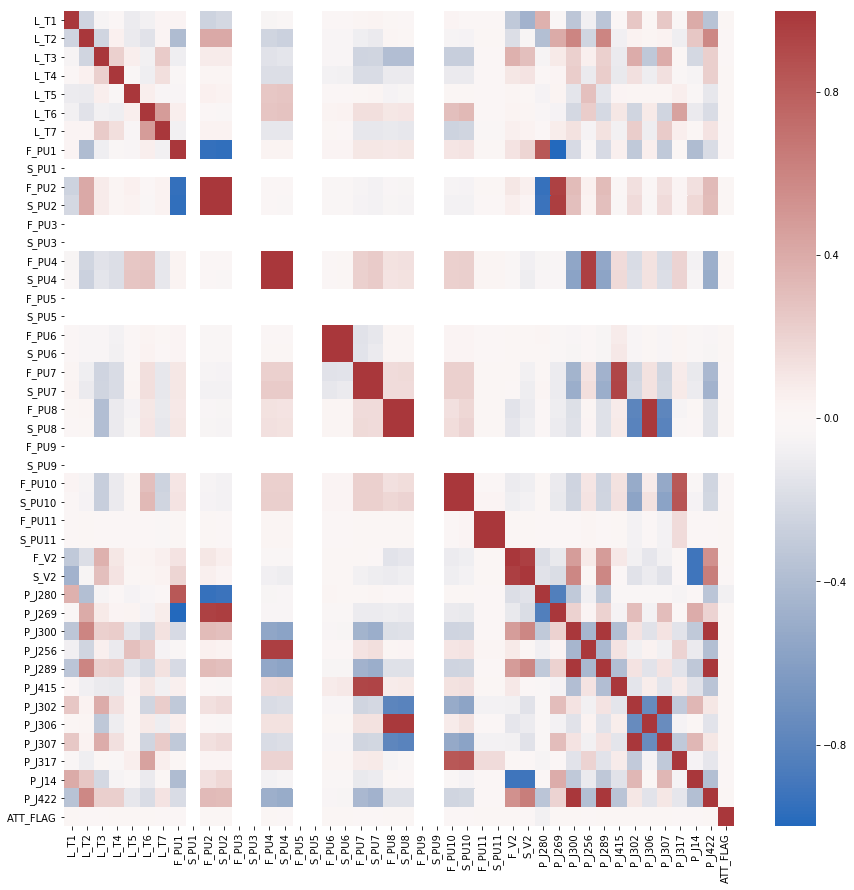

In [7]:
def getCorrelationPlot(df1, df2):
    df_all   = pd.concat([df1, df2])
    df_corr  = df_all.corr()
    f, axarr = plt.subplots(1, figsize=(15,15))
    sns.heatmap(df_corr,xticklabels=True, yticklabels=True, ax=axarr, cmap = sns.cm.vlag)
    plt.savefig('Q1_2_Correlation.png')
    return df_corr

df_corr = getCorrelationPlot(df_train, df_val)

In [96]:
print (df_corr['F_PU1']['P_J280'])
print (df_corr['F_PU1']['P_J269'])
# df_corr['F_PU1']

0.8332819638612872
-0.9999088074193487


# Task1.3 - Prediction (via persistence model)

 - RMSE :  6.859441890994473


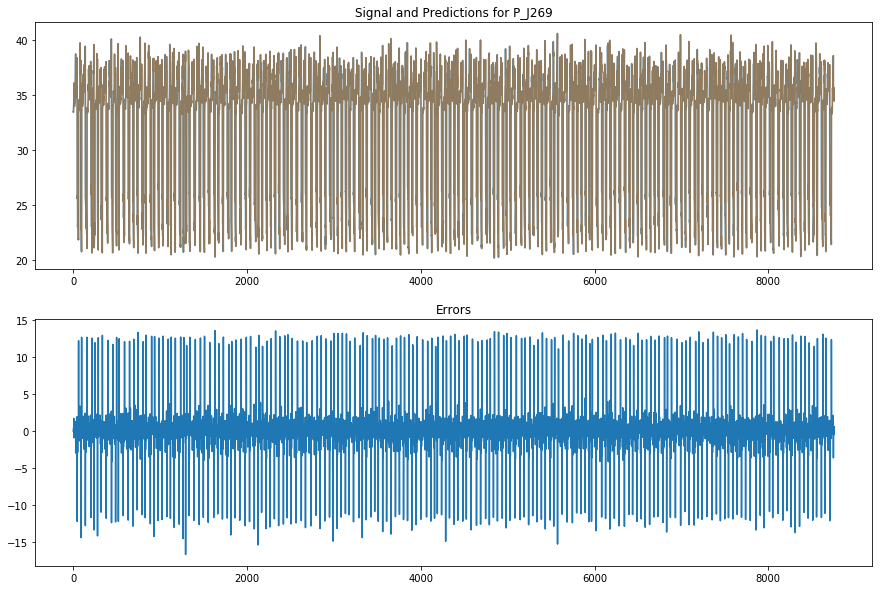

 - RMSE :  6.859441890994473


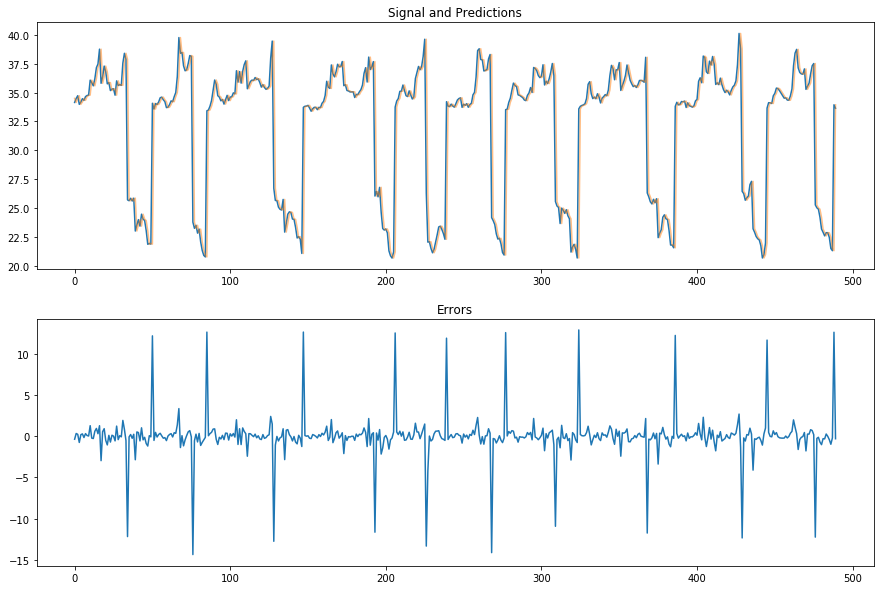

In [7]:
from sklearn.metrics import mean_squared_error

def model1(df, col, plot='no-zoom'):
    def predict(data,idx):
        if idx == 0:
            idx = 1
        return data[idx-1]

    # Step1 - Get Predictions 
    if (1):
        X_train = df[col].tolist()
        X_pred = []
        for i, val in enumerate(X_train):
            X_pred.append(predict(X_train, i))
        res_err = np.array(X_train) - np.array(X_pred)
        print (' - RMSE : ', mean_squared_error(X_train, X_pred))
        
    # Step2 - Plot Predictions 
    if (plot=='no-zoom'):
        f,axarr = plt.subplots(2,1, figsize=(15,10))
        axarr[0].plot(X_train)
        axarr[0].plot(X_pred, alpha=0.5)
        axarr[0].set_title('Signal and Predictions for {0}'.format(col))
        axarr[1].plot(res_err)
        axarr[1].set_title('Errors')
    elif plot == 'zoom':
        start = 10; end = 500;
        f,axarr = plt.subplots(2,1, figsize=(15,10))
        axarr[0].plot(X_train[start:end])
        axarr[0].plot(X_pred[start:end], alpha=0.5)
        axarr[1].plot(res_err[start:end])
        axarr[0].set_title('Signal and Predictions')
        axarr[1].set_title('Errors')
    plt.show()

if __name__ == "__main__":
    model1(df_train, 'P_J269', plot='no-zoom')
    model1(df_train, 'P_J269', plot='zoom')

# Task1.3 - Prediction (via LinearRegression model)

 - MSE :  22.1106


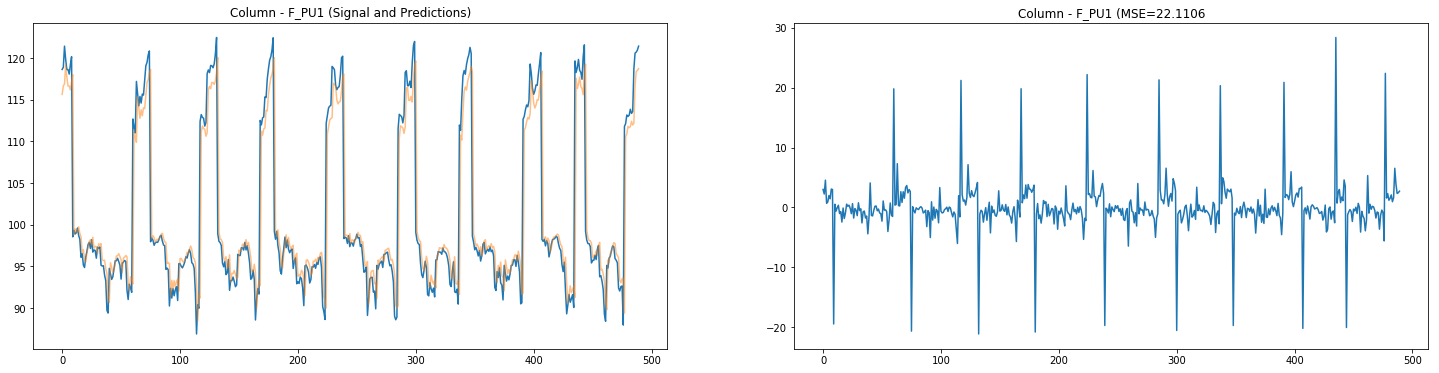

 - MSE :  345.9549


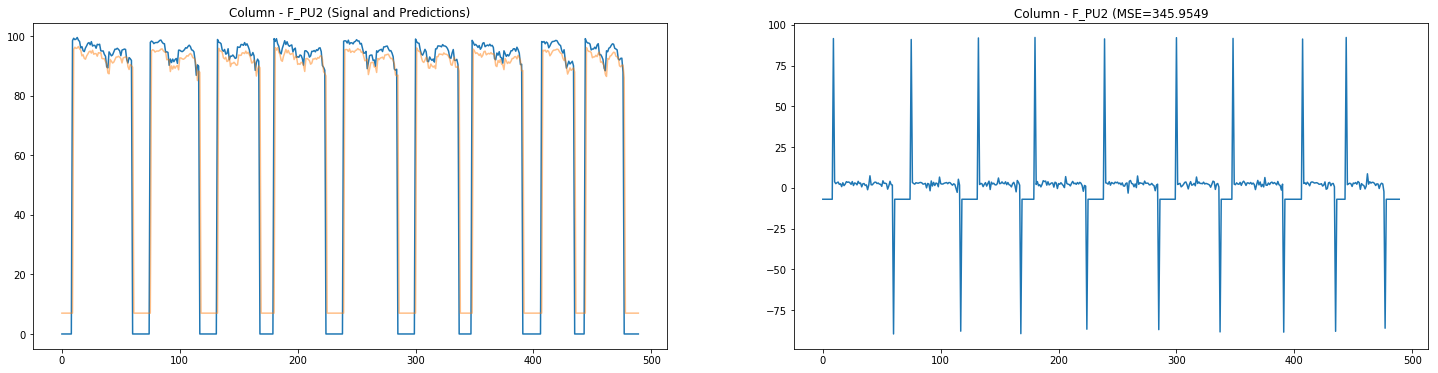

 - MSE :  508.618


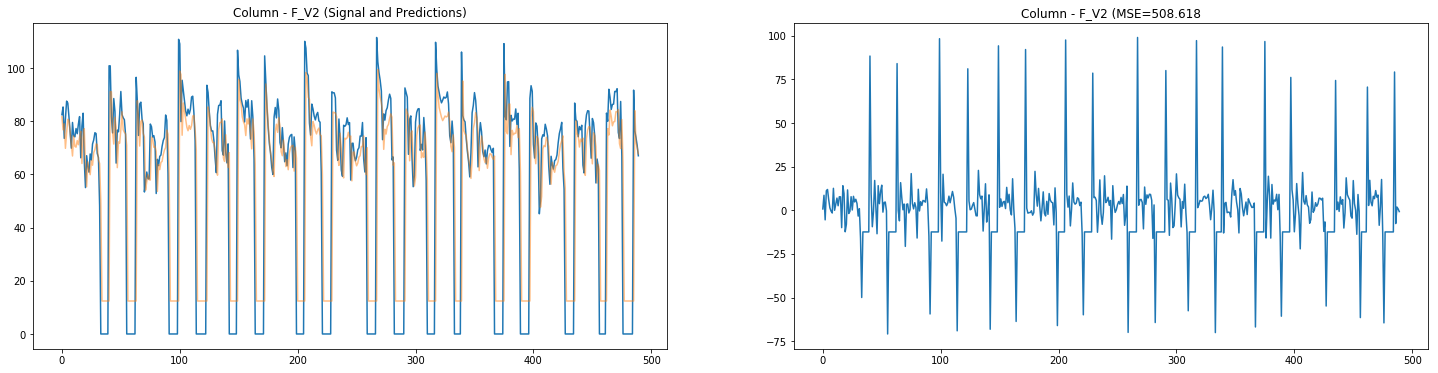

 - MSE :  2.7954


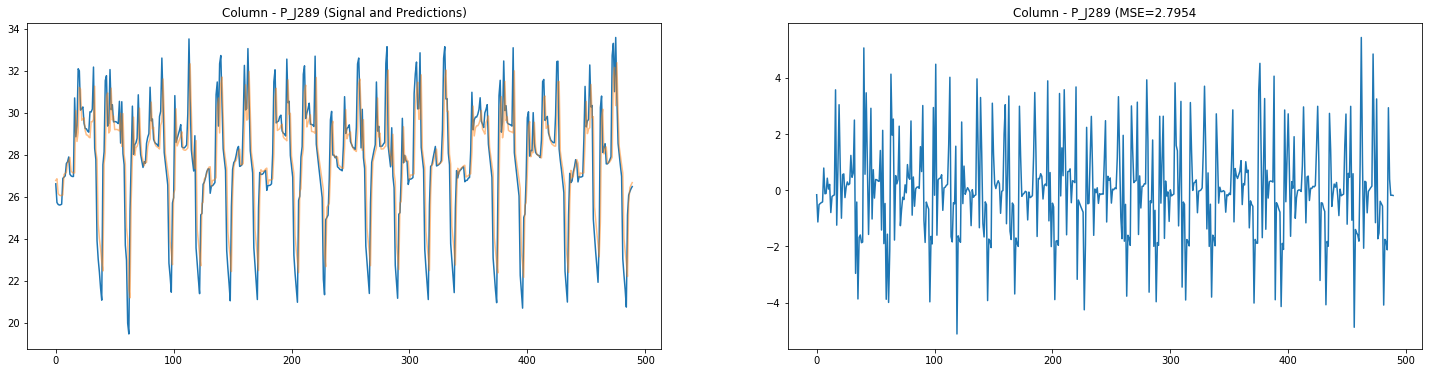

 - MSE :  13.3798


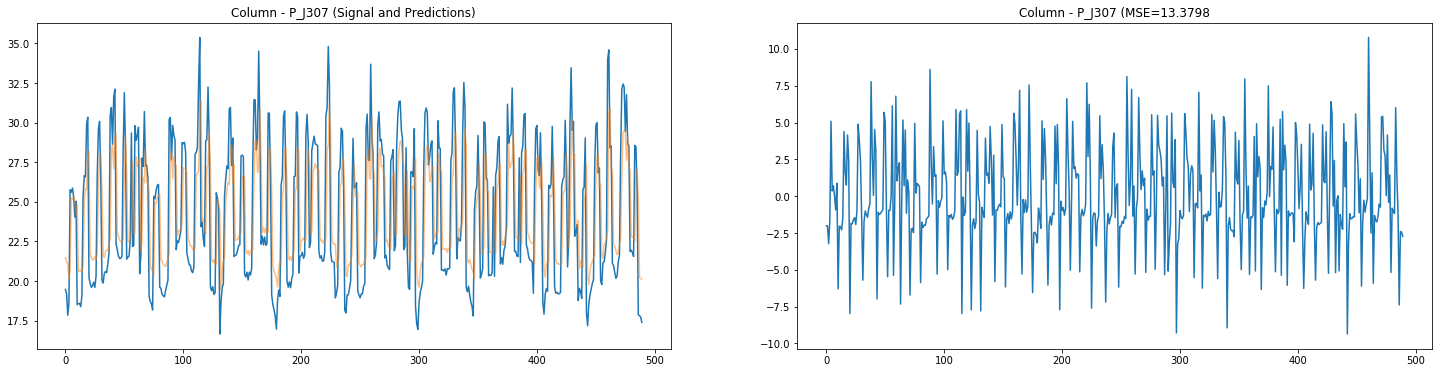

 - MSE :  8.3954


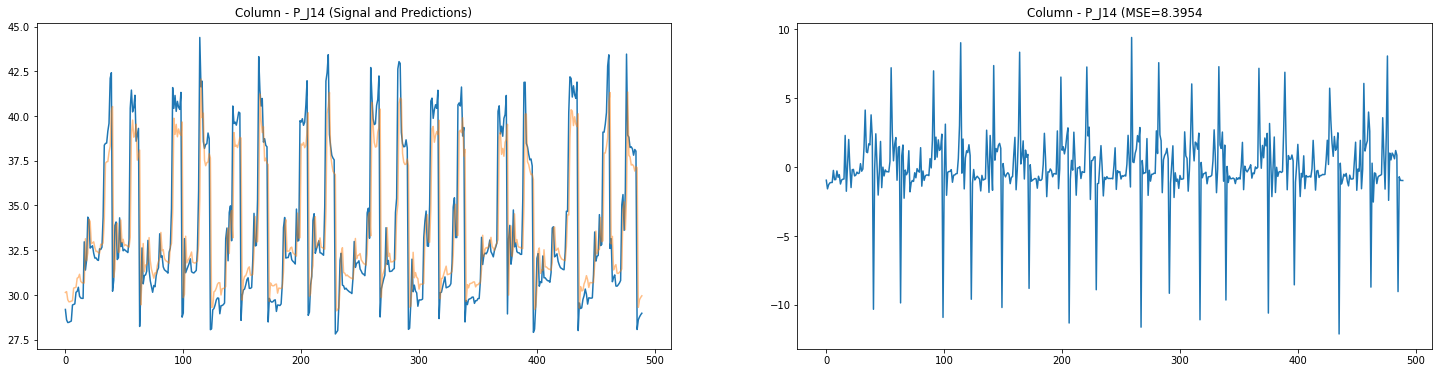

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def model2(df_train, df_val, col, plot='no-zoom'):
    # Step1 - Create Model 
    X_train   = np.array(df_train[col].tolist()[:-1]).reshape(-1, 1)
    Y_train   = np.array(df_train[col].tolist()[1:]).reshape(-1, 1)
    X_test    = np.array(df_val[col].tolist()[:-1]).reshape(-1, 1)
    Y_test    = np.array(df_val[col].tolist()[1:]).reshape(-1, 1)
    model     = LinearRegression().fit(X_train, Y_train)
    Y_predict = model.predict(X_test)
    res_err   = Y_test - Y_predict
    
    mse = round(mean_squared_error(Y_test, Y_predict),4)
    print (' - MSE : ', mse)

    # Step2 - Plot Predictions 
    if (plot == 'no-zoom'):
        f,axarr = plt.subplots(2,1, figsize=(15,10))
        axarr[0].plot(Y_test)
        axarr[0].plot(Y_predict, alpha=0.5)
        axarr[0].set_title('Signal and Predictions (via Linear Regression) for {0}'.format(col))
        axarr[1].plot(res_err)
        axarr[1].set_title('Errors || MSE={0}'.format(mse))
    elif (plot == 'zoom'):
        start = 10; end = 500;
        f,axarr = plt.subplots(1,2, figsize=(25,6))
        axarr[0].plot(Y_test[start:end])
        axarr[0].plot(Y_predict[start:end], alpha=0.5)
        axarr[1].plot(res_err[start:end])
        axarr[0].set_title('Column - {0} (Signal and Predictions)'.format(col))
        axarr[1].set_title('Column - {0} (MSE={1}'.format(col, mse))
    plt.show()
        
if __name__ == "__main__":
    for col in ['F_PU1', 'F_PU2', 'F_V2', 'P_J289', 'P_J307', 'P_J14']:
        # model2(df_train, df_val, col, plot='no-zoom')
        model2(df_train, df_val, col, plot='zoom')